In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
path = "./Admission.csv"
df = pd.read_csv(path)
df.head()

,GRE,TOEFL,Univ_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.info()  # 데이터 수가 적으므로 정규성 검증시 shapiro 진행

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
GRE                400 non-null int64
TOEFL              400 non-null int64
Univ_Rating        400 non-null int64
SOP                400 non-null float64
LOR                400 non-null float64
CGPA               400 non-null float64
Research           400 non-null int64
Chance_of_Admit    400 non-null float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
GRE,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
Univ_Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance_of_Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


In [5]:
# 결측치 확인

df.isnull().sum()

GRE                0
TOEFL              0
Univ_Rating        0
SOP                0
LOR                0
CGPA               0
Research           0
Chance_of_Admit    0
dtype: int64

###  상관관계 분석
#### 1-1) 종속변수(Chance_of_Admit) / 독립변수(GRE, TOEFL ~ CGPA) 에 대해 피어슨 상관계수를 이용한 상관관계 분석 수행
#### 1-2) 그래프를 이용하여 분석결과 설명

In [6]:
# 1-1) 피어슨 상관계수 : 두 연속형 자료가 모두 정규성을 따른다는 가정 하에 선형적 상관관계를 측정


# 귀무가설(Ho) : 변수1과 변수2간에는 상관관계가 없다(상관계수=0)
# 대립가설(H1) : 변수1과 변수2간에는 상관관계가 있다(상관계수는 0이 아니다)

# 상관계수 검정 후 p-value값이 0.05 이하인 경우 귀무가설 기각, 대립가설 채택

In [7]:
df.columns

Index(['GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR ', 'CGPA', 'Research',
       'Chance_of_Admit'],
      dtype='object')

In [9]:
# 정규성 검증

col_names = ['GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR ', 'CGPA','Chance_of_Admit']


for col in col_names:
    print(col, stats.shapiro(df[col]))
    
# p-value가 모두 0.05보다 작으므로 통계적으로 유의하다 -> 상관관계가 있다.

GRE (0.9857197403907776, 0.0005621708696708083)
TOEFL (0.9873192310333252, 0.0014660957967862487)
Univ_Rating (0.9060962796211243, 5.015321044208286e-15)
SOP (0.9559321403503418, 1.4363363831648712e-09)
LOR  (0.9569868445396423, 2.0381001331060133e-09)
CGPA (0.9932961463928223, 0.07241086661815643)
Chance_of_Admit (0.9774671196937561, 7.037693649181165e-06)


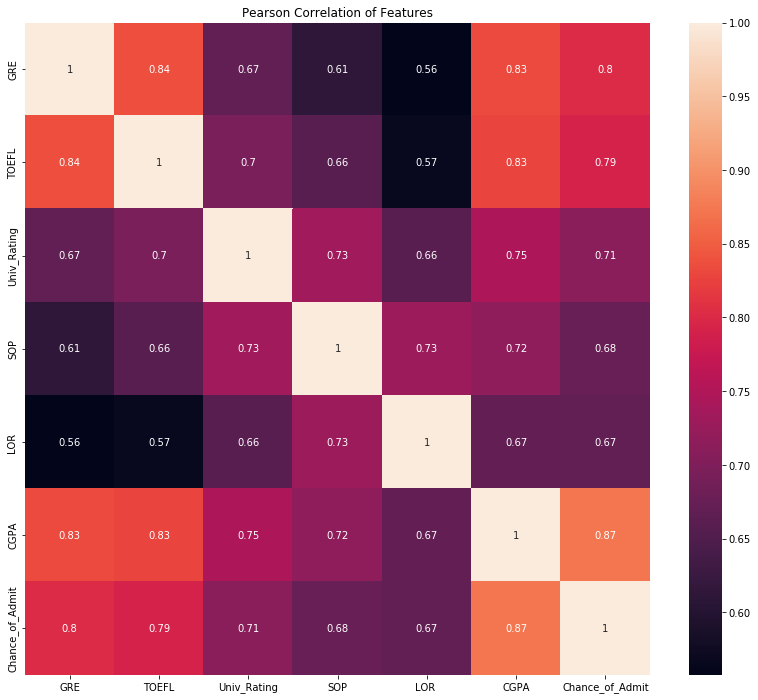

In [10]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features')

corr_ = df[col_names].corr(method='pearson')
sns.heatmap(corr_,annot=True) # annot=True : 실제값 표시

In [11]:
corr_

,GRE,TOEFL,Univ_Rating,SOP,LOR,CGPA,Chance_of_Admit
GRE,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.802610
TOEFL,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.791594
Univ_Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.873289
Chance_of_Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,1.000000


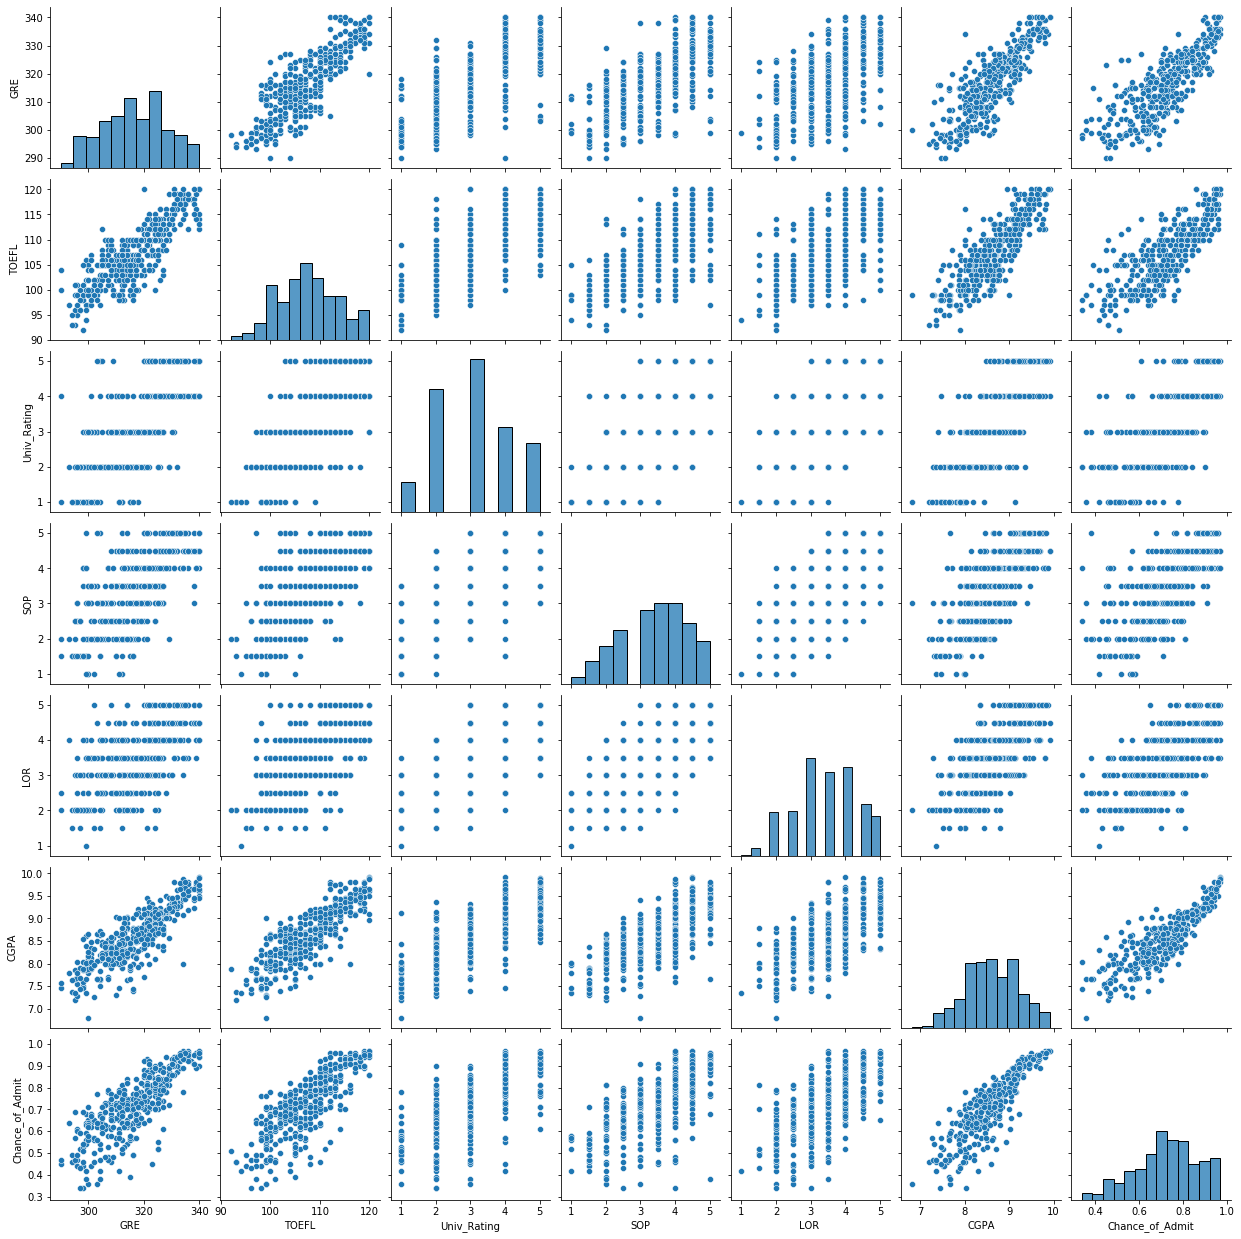

In [12]:
# 변수별 상관관계 확인

sns.pairplot(df[col_names])
plt.show()

In [13]:
# pearson 상관계수 검증(첫번째값:상관계수, 두번째값:p-value)

for col in col_names[:-1]:
    print(col, stats.pearsonr(df['Chance_of_Admit'], df[col]))
    

GRE (0.8026104595903505, 2.4581124141793456e-91)
TOEFL (0.7915939869351047, 3.6341021759974733e-87)
Univ_Rating (0.7112502503917223, 6.635019480890411e-63)
SOP (0.6757318583886719, 1.1410946671026845e-54)
LOR  (0.669888792010694, 2.0073145197528276e-53)
CGPA (0.8732890993553003, 2.336514000498104e-126)


In [14]:
# 분석결과

## 1) p-value 값이 모두 0.05보다 작으므로 귀무가설을 기각해 대립가설 채택
## 2) 모든 독립변수는 종속변수와 양의 상관관계에 있고, 통계적으로 유의하다.
## 3) Chance_of_Admit과 가장 높은 상관관계를 가지는 변수는 CGPA이고 상관계수는 0.873이다
## 4) Chance_of_Admit과 가장 낮은 상관관계를 가지는 변수는 SOP이고 상관계수는 0.669이다

#### 2) GRE, TOEFL, Univ_Rating, SOP, LOR, CGPA, Research가 Chance_of_Admit에 영향을 미치는지 알아보는 회귀분석을 단계적 선택법을 사용하여 수행하고 결과를 해석하시오. 

In [18]:
# 'LOR ' 스페이스 때문에 에러 발생->칼럼명 변경

df.rename(columns = {'LOR ' : 'LOR'}, inplace = True)

In [35]:
## 노가다로 시작...

In [19]:
# 1, 상수항

model = ols("Chance_of_Admit ~ 1", data = df)
print(model.fit().aic)
model = ols("Chance_of_Admit ~ GRE", data = df)
print(model.fit().aic)
model = ols("Chance_of_Admit ~ TOEFL", data = df)
print(model.fit().aic)
model = ols("Chance_of_Admit ~ Univ_Rating", data = df)
print(model.fit().aic)
model = ols("Chance_of_Admit ~ SOP", data = df)
print(model.fit().aic)
model = ols("Chance_of_Admit ~ LOR", data = df)
print(model.fit().aic)
model = ols("Chance_of_Admit ~ CGPA", data = df)
print(model.fit().aic)
model = ols("Chance_of_Admit ~ Research", data = df)
print(model.fit().aic)

-421.9675008461153
-833.3036090625237
-814.0320596259335
-701.9557569911271
-663.9413039109054
-658.194962759449
-995.2280599502851
-566.0996208404796


In [20]:
# 2. CGPA  추가

model = ols("Chance_of_Admit ~ CGPA", data = df)
print(model.fit().aic)
model = ols("Chance_of_Admit ~ GRE + CGPA", data = df)
print(model.fit().aic)
model = ols("Chance_of_Admit ~ TOEFL + CGPA", data = df)
print(model.fit().aic)
model = ols("Chance_of_Admit ~ Univ_Rating + CGPA", data = df)
print(model.fit().aic)
model = ols("Chance_of_Admit ~ SOP + CGPA", data = df)
print(model.fit().aic)
model = ols("Chance_of_Admit ~ LOR + CGPA", data = df)
print(model.fit().aic)
model = ols("Chance_of_Admit ~ Research + CGPA", data = df)
print(model.fit().aic)

-995.2280599502851
-1025.5660336332685
-1018.9842529381585
-1006.8680389342708
-1001.5274984560574
-1015.7470076699437
-1015.9356808220818


In [21]:
# 3. CGPA + GRE

model = ols("Chance_of_Admit ~ CGPA + GRE", data = df)
print(model.fit().aic)
model = ols("Chance_of_Admit ~ TOEFL + CGPA+ GRE", data = df)
print(model.fit().aic)
model = ols("Chance_of_Admit ~ Univ_Rating + CGPA+ GRE", data = df)
print(model.fit().aic)
model = ols("Chance_of_Admit ~ SOP + CGPA+ GRE", data = df)
print(model.fit().aic)
model = ols("Chance_of_Admit ~ LOR + CGPA+ GRE", data = df)
print(model.fit().aic)
model = ols("Chance_of_Admit ~ Research + CGPA+ GRE", data = df)
print(model.fit().aic)

-1025.5660336332685
-1031.471958368707
-1033.2658610918397
-1031.2937018884086
-1048.1535872746135
-1034.3274288099624


In [22]:
# 4. CGPA + GRE + LOR

model = ols("Chance_of_Admit ~ CGPA + GRE + LOR", data = df)
print(model.fit().aic)
model = ols("Chance_of_Admit ~ TOEFL + CGPA+ GRE + LOR", data = df)
print(model.fit().aic)
model = ols("Chance_of_Admit ~ Univ_Rating + CGPA+ GRE + LOR", data = df)
print(model.fit().aic)
model = ols("Chance_of_Admit ~ SOP + CGPA+ GRE + LOR", data = df)
print(model.fit().aic)
model = ols("Chance_of_Admit ~ Research + CGPA+ GRE + LOR", data = df)
print(model.fit().aic)

-1048.1535872746135
-1053.5667185479083
-1048.844311189117
-1046.3941388801927
-1055.081745596453


In [23]:
# 5. CGPA + GRE + LOR + Research

model = ols("Chance_of_Admit ~ CGPA + GRE + LOR + Research", data = df)
print(model.fit().aic)
model = ols("Chance_of_Admit ~ TOEFL + CGPA+ GRE + LOR + Research", data = df)
print(model.fit().aic)
model = ols("Chance_of_Admit ~ Univ_Rating + CGPA+ GRE + LOR + Research", data = df)
print(model.fit().aic)
model = ols("Chance_of_Admit ~ SOP + CGPA+ GRE + LOR + Research", data = df)
print(model.fit().aic)          

-1055.081745596453
-1061.224620591895
-1055.4165987329106
-1053.1427183484334


In [24]:
# 6. CGPA + GRE + LOR + Research + TOEFL

model = ols("Chance_of_Admit ~ CGPA + GRE + LOR + Research + TOEFL", data = df)
print(model.fit().aic)
model = ols("Chance_of_Admit ~ Univ_Rating + CGPA+ GRE + LOR + Research + TOEFL", data = df)
print(model.fit().aic)
model = ols("Chance_of_Admit ~ SOP + CGPA+ GRE + LOR + Research + TOEFL", data = df)
print(model.fit().aic)     

-1061.224620591895
-1060.386155238819
-1059.28368650627


In [25]:
# CGPA + GRE + LOR + Research + TOEFL 보다 AIC값이 작아지는 건 없으므로 종료
# 최종모델 : Chance_of_Admit ~ CGPA + GRE + LOR + Research + TOEFL

model = ols("Chance_of_Admit ~ CGPA + GRE + LOR + Research + TOEFL", data = df)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance_of_Admit   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     320.6
Date:                Wed, 29 Dec 2021   Prob (F-statistic):          2.04e-136
Time:                        20:20:33   Log-Likelihood:                 536.61
No. Observations:                 400   AIC:                            -1061.
Df Residuals:                     394   BIC:                            -1037.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2985      0.117    -11.070      0.000      -1.529      -1.068
CGPA           0.1210      0.012     10.312      0.000       0.098       0.144
GRE            0.0018      0.001      2.992      0.003       0.001       0.003
LOR            0.0228      0.005      4.741      0.000       0.013       0.032
Research       0.0246      0.008      3.103      0.002       0.009       0.040
TOEFL          0.0030      0.001      2.847      0.005       0.001       0.005
==============================================================================
Omnibus:                       87.489   Durbin-Watson:                   0.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.337
Skew:                          -1.157   Prob(JB):                     1.14e-39
Kurtosis:                       5.325   Cond. No.                     1.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# 분석결과

## 1) p-value 값이 모두 0.05보다 작으므로 통계적으로 유의하다
## 2) 모형의 결정계수는 0.803이고, 수정된 결정계수는 0.800으로 추정된 다변량회귀식은 전체 데이터의 80%를 설명한다.
## 3) 회귀분석 결과 회귀식은 y = -1.298 + 0.1210 * CGPA + 0.0018 * GRE + 0.0228 * LOR + 0.0246 * Research + 0.0030 * TOEFL

In [54]:
# 변수선택법 함수 만들기
# 참고 : https://acdongpgm.tistory.com/111

def processSubset(x,y,feature_set):
    model = ols(y,x[list(feature_set)]) # 모델링
    regr = model.fit() # 모델학습
    AIC = regr.aic # 모델의 AIC
    return {"model" : regr, "AIC" : AIC}


#### 3-1) 새롭게 생성된 회귀모형에 대한 잔차분석을 수행하고,
#### 3-2) 그래프를 활용하여 결과를 해석하시오.


In [27]:
# 잔차분석 가정 검증

# !) 독립성
# 2) 정규성
# 3) 등분산성

# 참고 : https://mindscale.kr/course/basic-stat-python/14/

In [28]:
# 1) 독립성

# 회귀분석에서 잔차는 정규성, 등분상성 그리고 독립성을 가지는 것으로 가정
# 자료 수집 과정에서 무작위 표집(random sampling)을 하였다면, 잔차의 독립성은 만족하는 것으로 봄
# 시계열 자료나 종단연구 자료처럼, 연구 설계 자체가 독립성을 담보할 수 없는 경우에는 더빈-왓슨 검정(Durbin-Watson test) 등을 실시

# Durbin-Watson :  2에 가까울수록 자기상관이 없고, 0에 가까우면 양의 상관관계, 4에 가까우면 음의 상관관계

# 결과값 : 0.750이므로 0에 가깝기때문에 독립성 가정을 만족하다고 보기 힘들다. 

In [29]:
# 모형의 선형성


fitted = model.fit().predict(df[['CGPA', 'GRE', 'LOR', 'Research', 'TOEFL']])
residual = df['Chance_of_Admit'] - fitted


C:\Users\User\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


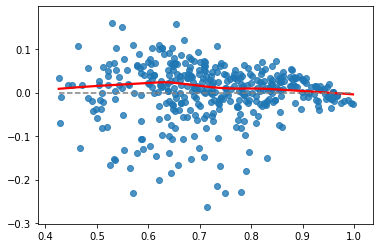

In [30]:
sns.regplot(fitted, residual, lowess=True, line_kws={'color' : 'red'})
plt.plot([fitted.min(), fitted.max()], [0,0], '--', color = 'grey')

# 예측값(fitted)과 잔차(residual)의 비교
# 모든 예측값에서 잔차가 비슷하게 있어야 함(가운데 점선)
# 빨간 실선은 잔차의 추세를 나타냄
# 빨간 실선이 점선에서 크게 벗어난다면 예측값에 따라 잔차가 크게 달라진다는 것
# 실선이 수평선에 가까울수록 등분산성이 있다는 것

In [31]:
# 2) 정규성

# 2-1) Q-Q플롯

sr = stats.zscore(residual)
(x,y),_ = stats.probplot(sr)

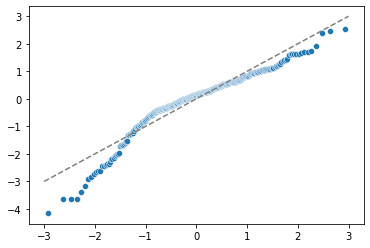

In [32]:
sns.scatterplot(x,y)
plt.plot([-3,3], [-3,3],'--', color = 'grey')

# 잔차가 정규분포를 띄면 Q-Q 플롯에서 점들이 점선을 따라 배치되어 있어야 함

In [33]:
# 2-2) 샤피로 검정

stats.shapiro(residual)

# 두번째 값인 p 값이 0.05보다 작으므로 귀무가설을 기각하고 대립가설 채택, 즉 정규분포를 따른다고 보기 힘들다.

(0.9219251275062561, 1.4429574885215651e-13)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


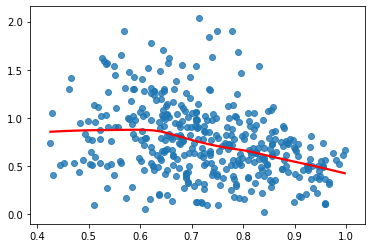

In [34]:
# 3) 잔차의 등분산성

# 회귀 모형을 통해 예측된 값이 크던 작던, 모든 값들에 대하여 잔차의 분산이 동일하다는 가정
# 예측값(가로축)에 따라 잔차가 어떻게 달라지는지 보여줌
# 빨간색 실선이 수평선을 그리는 것이 이상적

sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})